**Data Ingestion**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
#importing the data
from google.colab import files
uploaded = files.upload()

Saving Telconnect data.csv to Telconnect data (1).csv


In [ ]:
#reading in and checking the first five rows of the dataset
customer_churn = pd.read_csv('Telconnect data.csv')
customer_churn.head()

,customerID,gender,SeniorCitizen,Has_Partner,Has_Dependents,account_tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#summary statistics
customer_churn.describe()

,SeniorCitizen,account_tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#datatype of all columns
customer_churn.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Has_Partner,object
Has_Dependents,object
account_tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# Converting 'TotalCharges' column to numeric (float64)
customer_churn['TotalCharges'] = pd.to_numeric(customer_churn['TotalCharges'], errors='coerce')

In [ ]:
#checking for missing values in the data
customer_churn.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Has_Partner,0
Has_Dependents,0
account_tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


We have missing values in TotalCharges

In [ ]:
#replacing missing values in TotalCharges with the median
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].fillna(customer_churn['TotalCharges'].median())

In [ ]:
#rechecking for missing values
customer_churn.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Has_Partner,0
Has_Dependents,0
account_tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#encoding churn column
customer_churn['churn_encoded'] = customer_churn['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
#dropping the Churn column (to avoid duplicity)
customer_churn.drop('Churn', axis=1, inplace=True)

In [ ]:
#rechecking the first five rows
customer_churn.head()

,customerID,gender,SeniorCitizen,Has_Partner,Has_Dependents,account_tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_encoded
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
#churn rate calculation for this month
churn_rate = customer_churn['churn_encoded'].mean()
print(f"Churn Rate: {churn_rate * 100:.2f}%")

Churn Rate: 26.54%


Churn Rate is 26.54%

**Exploratory Data Analysis**

Univariate Analysis

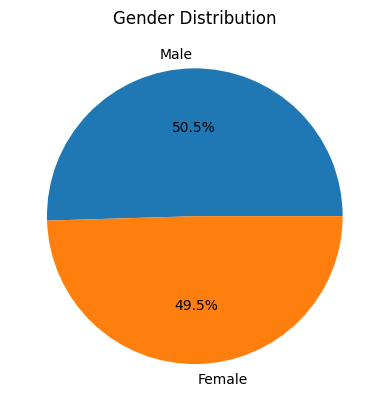

In [ ]:
#piechart distribution of gender
gender_counts = customer_churn['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

From the piechart of gender distribution, we can see that we have slightly more male customers in our data.

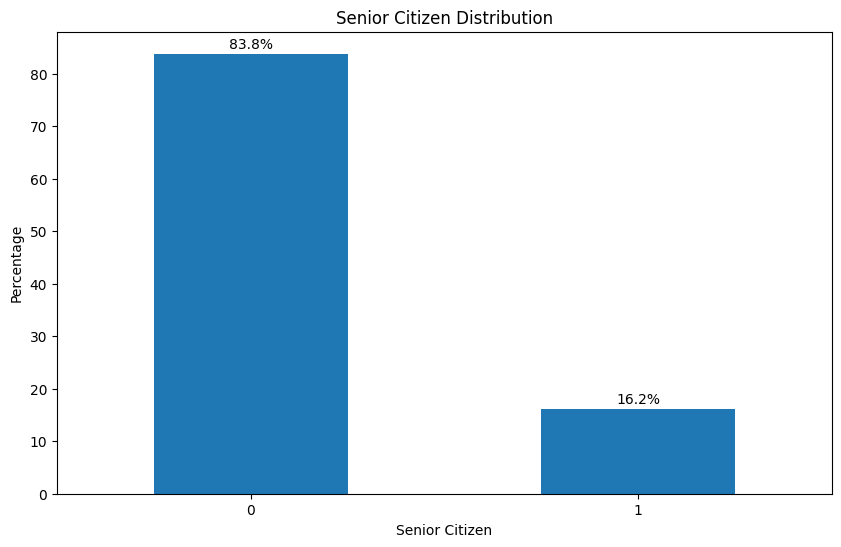

In [ ]:
#bar chart showing senior citizen distribution
# Calculate percentages
percentages = customer_churn['SeniorCitizen'].value_counts(normalize=True) * 100
#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')
#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=10)
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.xticks(rotation='horizontal')
plt.title('Senior Citizen Distribution')
plt.show()

The barplot shows that a lot of customers in our data are not senior citizens. Senior citizens have a perecentage of 16.2% against customers who are not senior citizens at 83.8%.

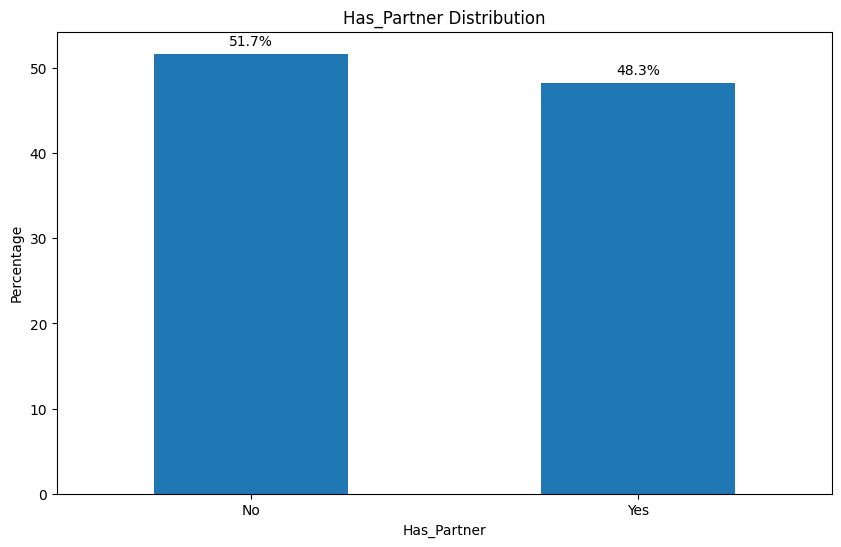

In [ ]:
#barchart showing has_partner distribution
# Calculate percentages
percentages = customer_churn['Has_Partner'].value_counts(normalize=True) * 100
#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')
#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=10)
plt.xlabel('Has_Partner')
plt.ylabel('Percentage')
plt.xticks(rotation='horizontal')
plt.title('Has_Partner Distribution')
plt.show()

The barplot shows that customers who do not have a partner are slightly more than those that have partners.

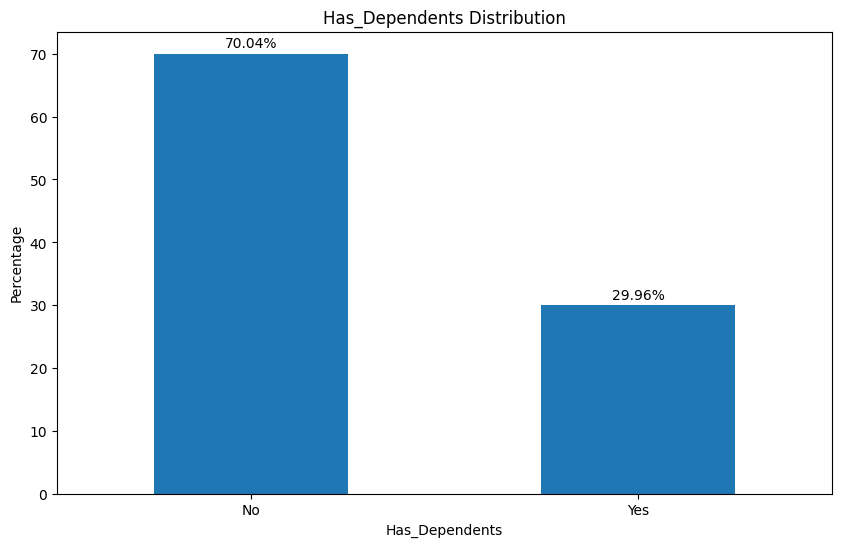

In [ ]:
#barchart showing has_dependents distribution
# Calculate percentages
percentages = customer_churn['Has_Dependents'].value_counts(normalize=True) * 100
#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')
#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', fontsize=10)
plt.xlabel('Has_Dependents')
plt.ylabel('Percentage')
plt.xticks(rotation='horizontal')
plt.title('Has_Dependents Distribution')
plt.show()

Customers who have dependents (70.04%) are more than those who do not have dependents(29.96%).

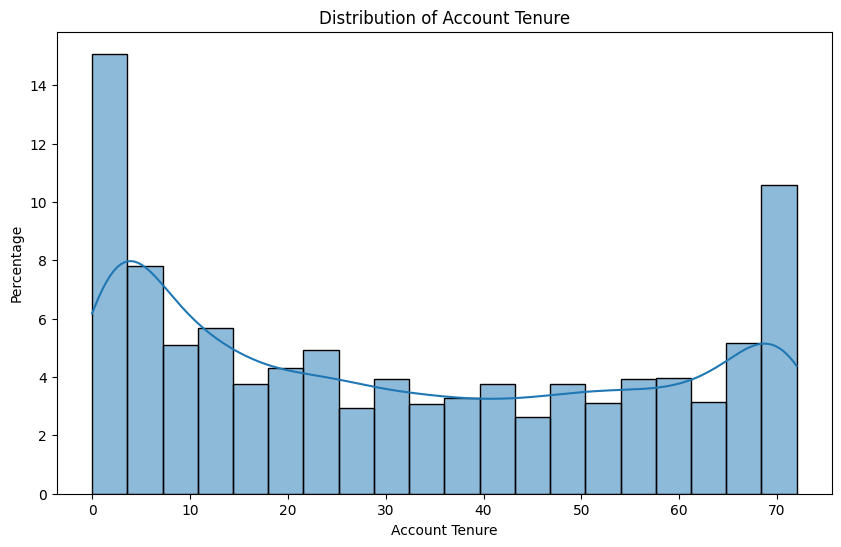

In [ ]:
#distribution of account tenure in percentage
plt.figure(figsize=(10, 6))
sns.histplot(customer_churn['account_tenure'], bins=20, kde=True, stat="percent")
plt.xlabel('Account Tenure')
plt.ylabel('Percentage')
plt.title('Distribution of Account Tenure')
plt.show()

  From the visualization, we can tell that most customers have account tenure within the first few years (0 to 5years). Customers with account tenure of 70 years also have a significant percentage 11%, which can signify a set of loyal customer base.

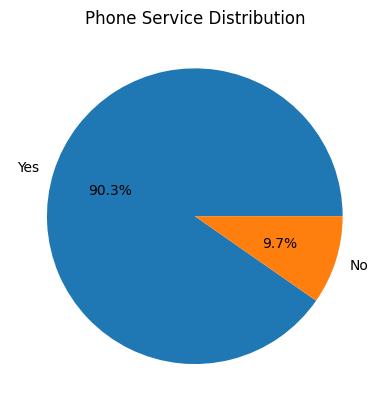

In [ ]:
#piechart distribution of phone service in percentage
phone_service_counts = customer_churn['PhoneService'].value_counts()
plt.pie(phone_service_counts, labels=phone_service_counts.index, autopct='%1.1f%%')
plt.title('Phone Service Distribution')
plt.show()

The chart of phone service distribution, shows that most of the customers (90.3%) have phone service.

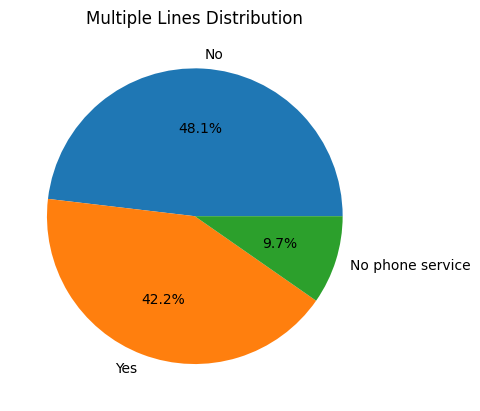

In [ ]:
#piechart distribution of multiplelines in percentage
multiplelines_counts = customer_churn['MultipleLines'].value_counts()
plt.pie(multiplelines_counts, labels=multiplelines_counts.index, autopct='%1.1f%%')
plt.title('Multiple Lines Distribution')
plt.show()

From the piechart distribution of multiple lines, customers who have multiple lines (42.2%) are slightly less than those who do not have multiple lines (48.1%). 9.7% of customers have no phone service.

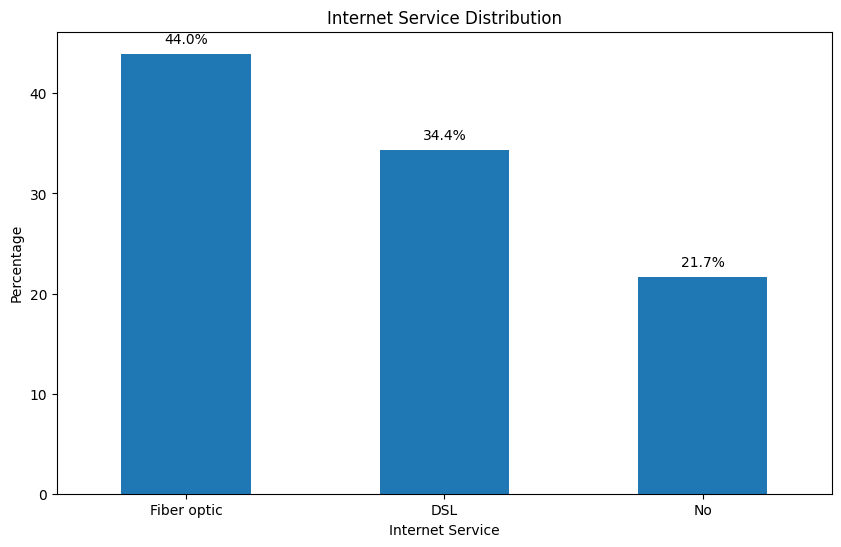

In [ ]:
#barchart showing distribution of internet service
# Calculate percentages
percentages = customer_churn['InternetService'].value_counts(normalize=True) * 100
#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')
#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=10)
plt.xlabel('Internet Service')
plt.ylabel('Percentage')
plt.xticks(rotation='horizontal')
plt.title('Internet Service Distribution')
plt.show()

From the barchart distribution of internet service, 44% of customers use fiber optic, 34.4% use DSL (Digital Suscriber Line), 21.7% do not have internet service.

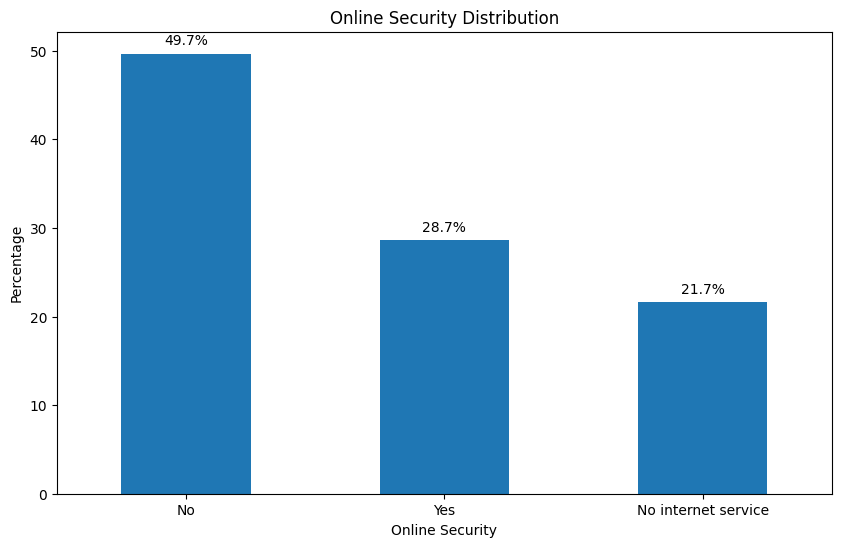

In [ ]:
#barchart distribution of OnlineSecurity
# Calculate percentages
percentages = customer_churn['OnlineSecurity'].value_counts(normalize=True) * 100
#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')
#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=10)
plt.xlabel('Online Security')
plt.ylabel('Percentage')
plt.xticks(rotation='horizontal')
plt.title('Online Security Distribution')
plt.show()

From the bar chart of online security, we can say that most customers do not suscribe to online security. Cutomers with no internet service have no need to suscribe to online security.

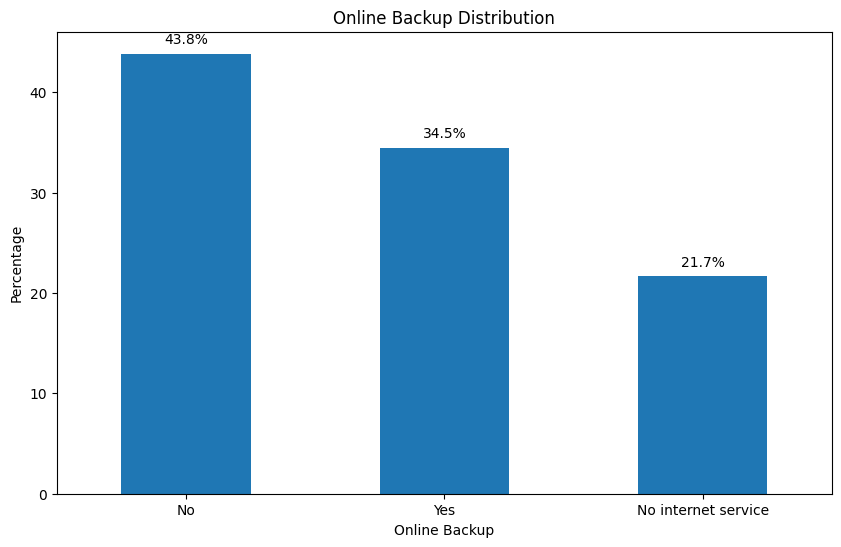

In [ ]:
#barchart distribution of OnlineBackup
# Calculate percentages
percentages = customer_churn['OnlineBackup'].value_counts(normalize=True) * 100
#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')
#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=10)
plt.xlabel('Online Backup')
plt.ylabel('Percentage')
plt.xticks(rotation='horizontal')
plt.title('Online Backup Distribution')
plt.show()

A greater percentage of customers have no online backup and customers with no internet service have no need for online backup.

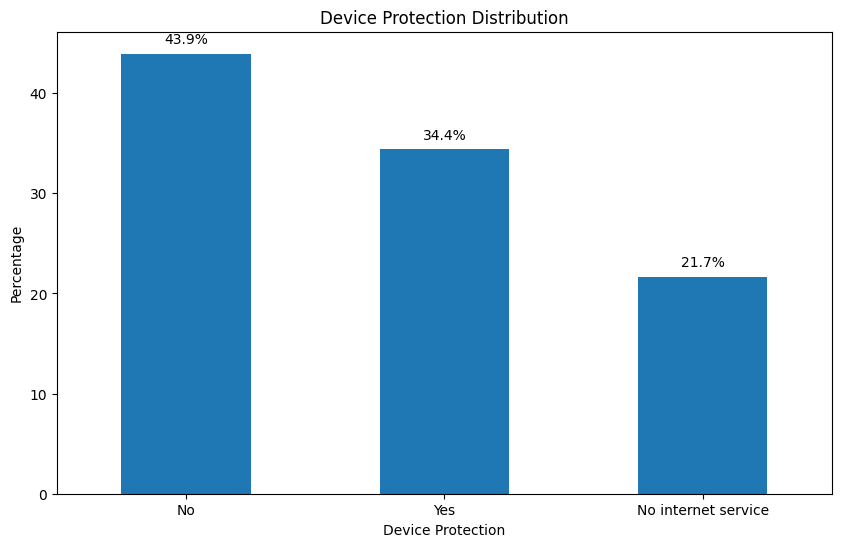

In [ ]:
#barchart distribution of DeviceProtection
# Calculate percentages
percentages = customer_churn['DeviceProtection'].value_counts(normalize=True) * 100
#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')
#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=10)
plt.xlabel('Device Protection')
plt.ylabel('Percentage')
plt.xticks(rotation='horizontal')
plt.title('Device Protection Distribution')
plt.show()

A greater percentage of customers have no device protection and customers with no internet service have no need for device protection.

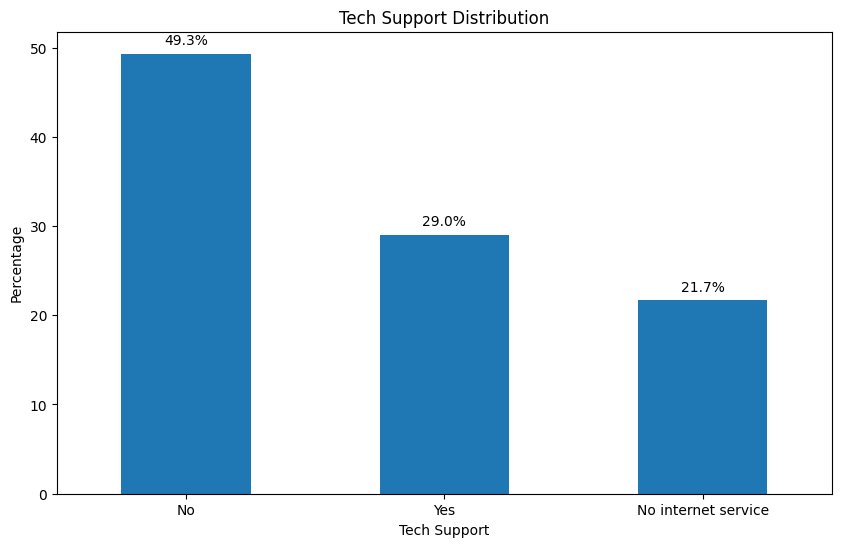

In [ ]:
#barchart distribution of TechSupport
# Calculate percentages
percentages = customer_churn['TechSupport'].value_counts(normalize=True) * 100
#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')
#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=10)
plt.xlabel('Tech Support')
plt.ylabel('Percentage')
plt.xticks(rotation='horizontal')
plt.title('Tech Support Distribution')
plt.show()

From the barchart of tech support distribution, 49.3% have no tech support, 29% have tech support and 21.7% have no internet service/no tech support.

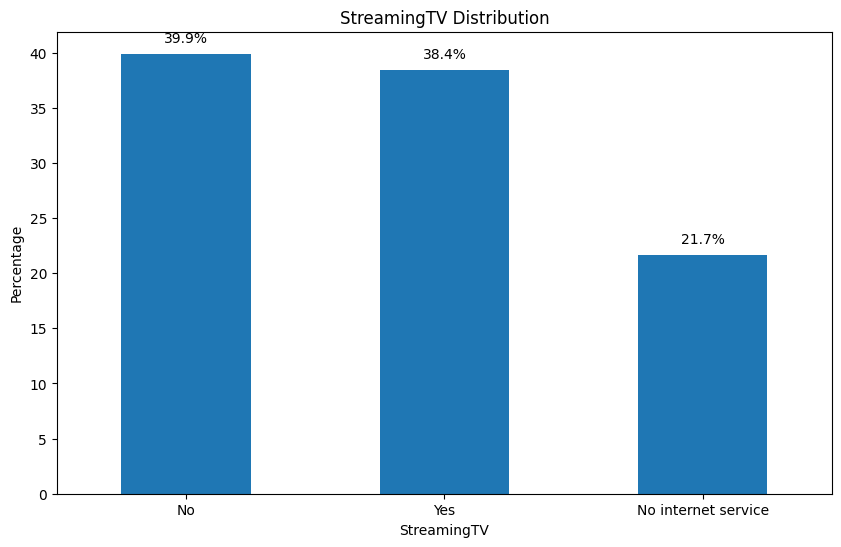

In [ ]:
#barchart distribution of StreamingTV
# Calculate percentages
percentages = customer_churn['StreamingTV'].value_counts(normalize=True) * 100
#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')
#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=10)
plt.xlabel('StreamingTV')
plt.ylabel('Percentage')
plt.xticks(rotation='horizontal')
plt.title('StreamingTV Distribution')
plt.show()

We have an almost equal percentage of customers who stream TV (39.9%) and those who do not stream TV (38.4%). 21.7% of customers have no internet service and therefore do not stream TV.

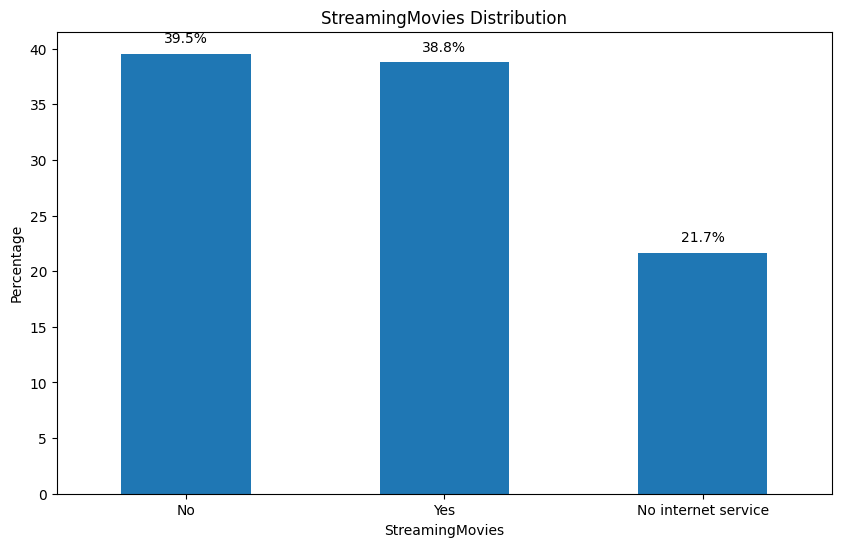

In [ ]:
#barchart distribution of StreamingMovies
# Calculate percentages
percentages = customer_churn['StreamingMovies'].value_counts(normalize=True) * 100
#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')
#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=10)
plt.xlabel('StreamingMovies')
plt.ylabel('Percentage')
plt.xticks(rotation='horizontal')
plt.title('StreamingMovies Distribution')
plt.show()

We have an almost equal percentage of customers who stream movies (39.5%) and those who do not stream movies (38.8%). 21.7% of customers have no internet service and therefore do not stream movies.

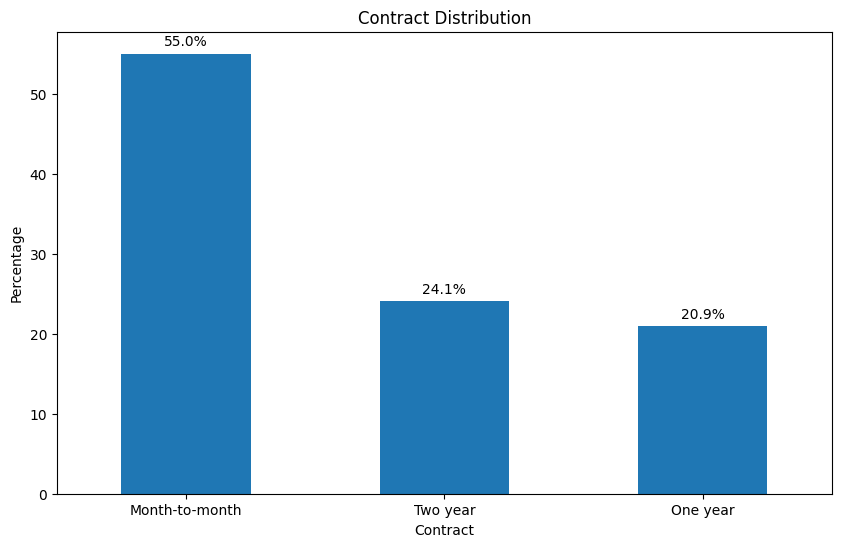

In [ ]:
#barchart distribution of Contract
# Calculate percentages
percentages = customer_churn['Contract'].value_counts(normalize=True) * 100
#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')
#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=10)
plt.xlabel('Contract')
plt.ylabel('Percentage')
plt.xticks(rotation='horizontal')
plt.title('Contract Distribution')
plt.show()

The bar chart shows the contract distribution of customers, 55% of customers have a month-to-month contract, 24.1% have a two year contract and 20.9% have a year contract.

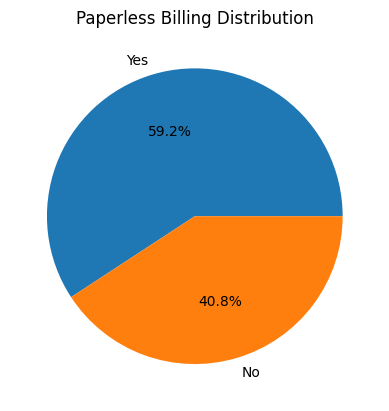

In [ ]:
#piechart distribution of paperless billing in percentage
paperless_billing_counts = customer_churn['PaperlessBilling'].value_counts()
plt.pie(paperless_billing_counts, labels=paperless_billing_counts.index, autopct='%1.1f%%')
plt.title('Paperless Billing Distribution')
plt.show()

From the piechart visualization, 59.2% of customers opted for paperless billing while 40.8% of customers opted out of paparless billing.

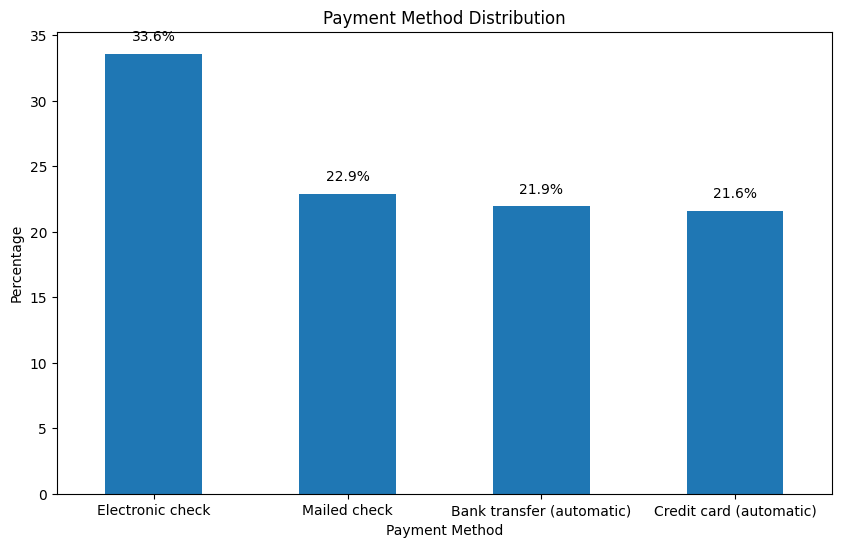

In [ ]:
#barchart distribution of payment method
# Calculate percentages
percentages = customer_churn['PaymentMethod'].value_counts(normalize=True) * 100
#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')
#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=10)
plt.xlabel('Payment Method')
plt.ylabel('Percentage')
plt.xticks(rotation='horizontal')
plt.title('Payment Method Distribution')
plt.show()

The barchart shows the payment method distribution, 33.6% of customers make payment via electronic check, 22.9% make payment via mailed check, 21.9% make payment through bank transfer and 21.6% make payment with their credit card.

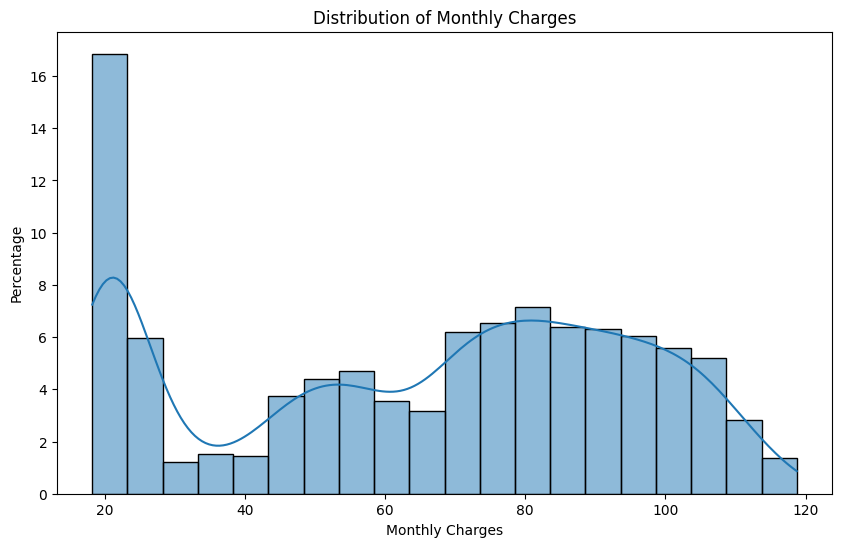

In [ ]:
#distribution of monthly charges in percentage
plt.figure(figsize=(10, 6))
sns.histplot(customer_churn['MonthlyCharges'], bins=20, kde=True, stat="percent")
plt.xlabel('Monthly Charges')
plt.ylabel('Percentage')
plt.title('Distribution of Monthly Charges')
plt.show()

From the bar chart of monthly charges a high percentage of customers have a monthly charge within the 20 range. A bulk of customers also have a monthly charge from 70 to 100.

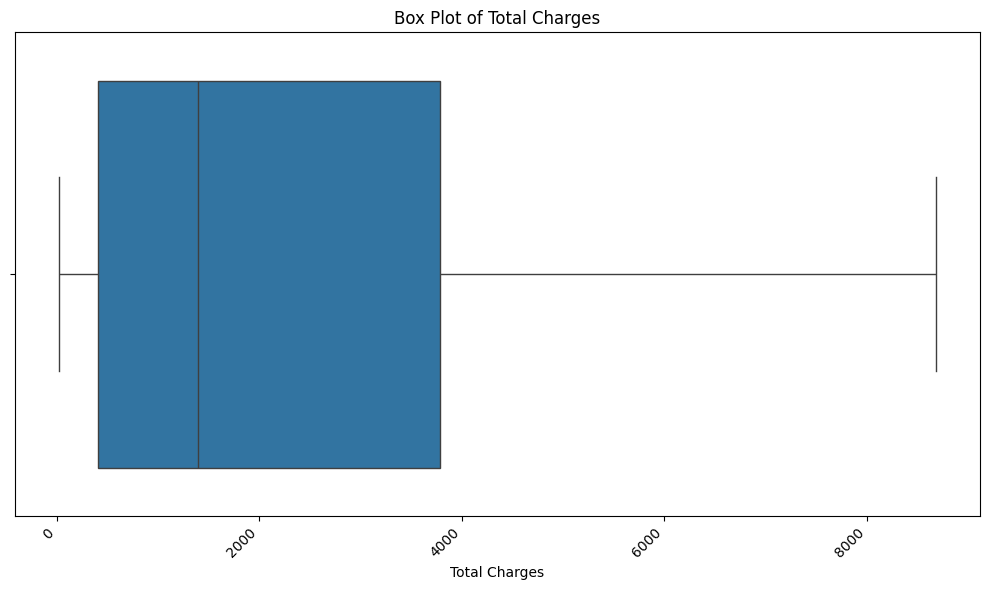

In [ ]:
#boxplot of TotalCharges
plt.figure(figsize=(10, 6))
sns.boxplot(x='TotalCharges', data=customer_churn)
plt.xlabel('Total Charges')
plt.title('Box Plot of Total Charges')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The boxplot shows that the bulk of the total charges are between the 500 to 4000 range. The mean falls in 1500, the boxplot does not show presence of outliers.

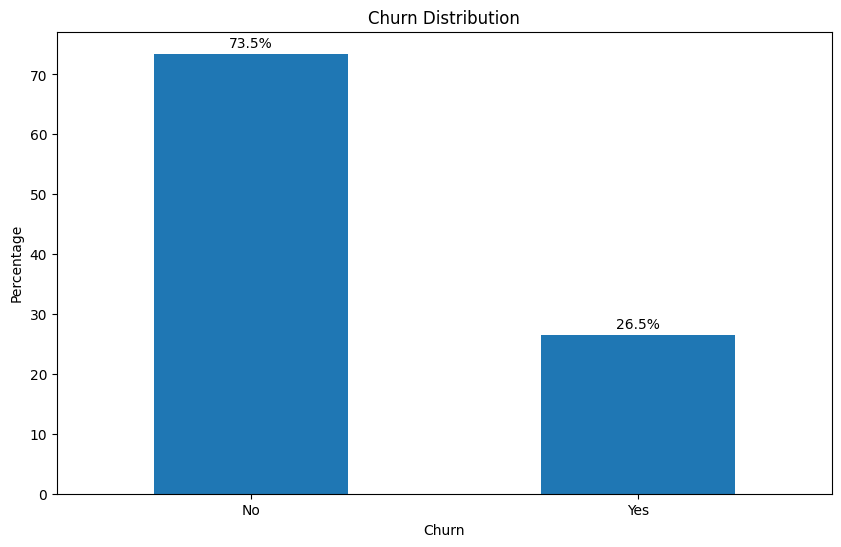

In [ ]:
#barchart distribution of churn_encoded
# Calculate percentages
percentages = customer_churn['churn_encoded'].value_counts(normalize=True) * 100
#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')
#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=10)
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.xticks(rotation='horizontal')
plt.title('Churn Distribution')
# Modify x-axis labels
ax.set_xticklabels(['No', 'Yes'])
plt.show()

From the barplot, 73.5% of customers did not churn and 26.5% of customers churned. This also shows an imbalanced target variable which will be treated when modeling.

Bivariate Analysis

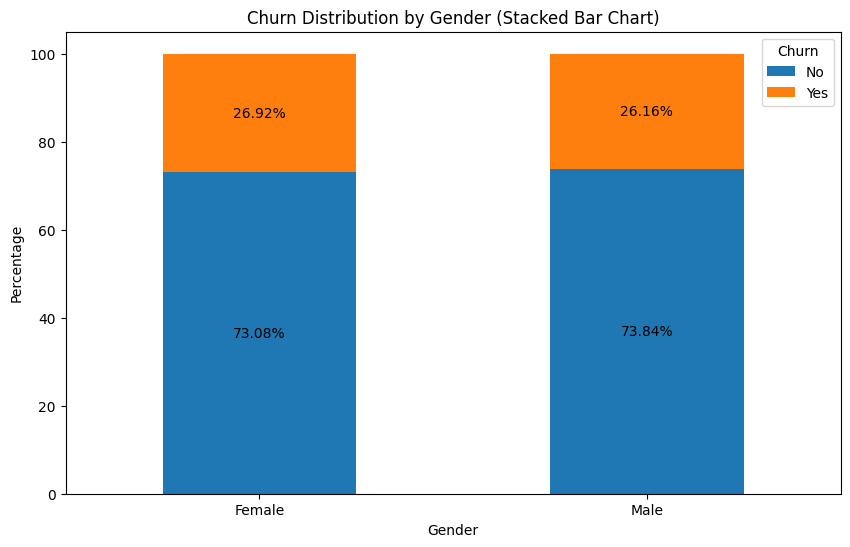

In [ ]:
#stacked barchart distribution of gender vs churn_encoded in percentage
# Calculate percentages
churn_percentages = customer_churn.groupby(['gender', 'churn_encoded'])['churn_encoded'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Creating the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, gender in enumerate(churn_percentages.index):
    cumulative = 0
    for j, churn_status in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[gender, churn_status]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Gender (Stacked Bar Chart)')
plt.legend(title='Churn')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

From the stacked barchart of gender by churn, we can see that there is an almost equal percentage of churn in both genders.

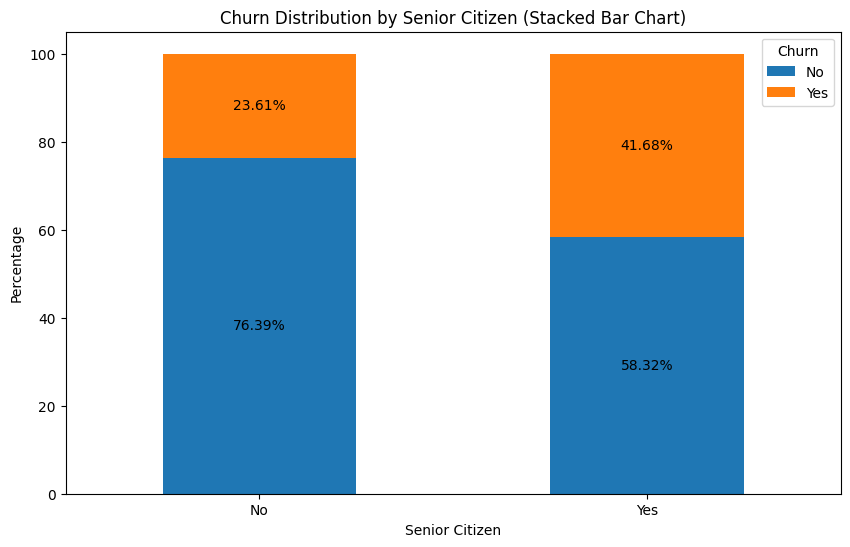

In [ ]:
#stacked barchart distribution of seniorcitizen vs churn_encoded in percentage
# Calculate percentages
churn_percentages = customer_churn.groupby(['SeniorCitizen', 'churn_encoded'])['churn_encoded'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, senior_citizen in enumerate(churn_percentages.index):
    cumulative = 0
    for j, churn_status in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[senior_citizen, churn_status]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Senior Citizen (Stacked Bar Chart)')
plt.legend(title='Churn')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

From our stacked barchart of senior citizens vs churn, we have a higher percentage of churn rate (41.68%) in customers who are senior citizens.

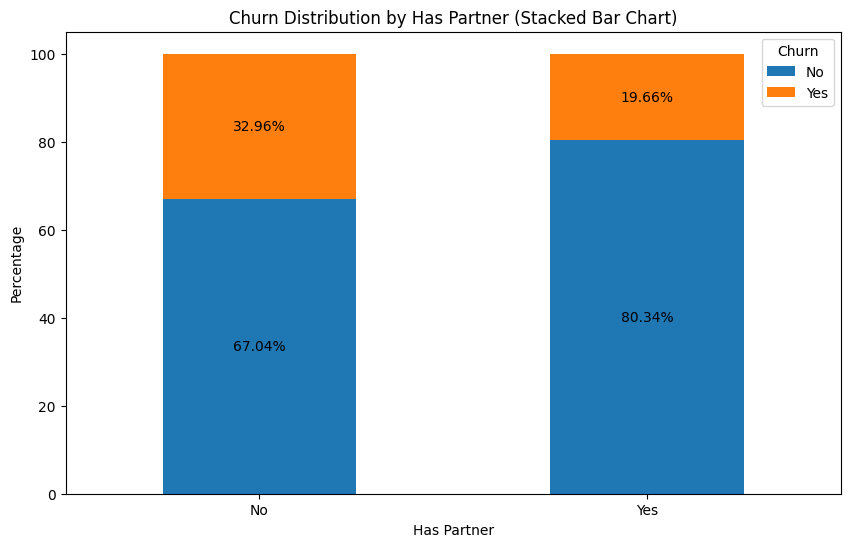

In [ ]:
#stacked barchart distribution of Has_Partner vs churn_encoded in percentage
# Calculate percentages
churn_percentages = customer_churn.groupby(['Has_Partner', 'churn_encoded'])['churn_encoded'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Creating the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, has_partner in enumerate(churn_percentages.index):
    cumulative = 0
    for j, churn_status in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[has_partner, churn_status]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Has Partner')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Has Partner (Stacked Bar Chart)')
plt.legend(title='Churn')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

From our stacked barchart of Has_Partner vs churn, we have a higher percentage of churn rate (32.96%) in customers who have no partner.

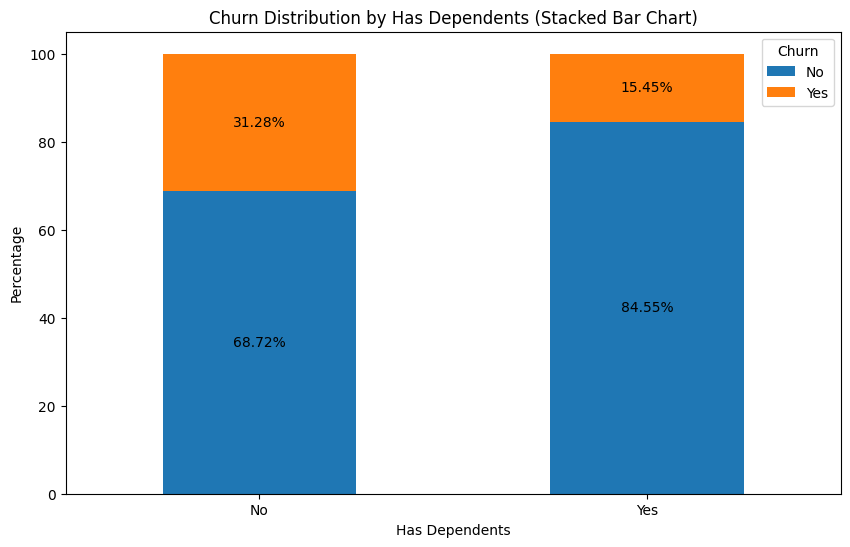

In [ ]:
#stacked barchart distribution of Has_Dependents vs churn_encoded in percentage
# Calculate percentages
churn_percentages = customer_churn.groupby(['Has_Dependents', 'churn_encoded'])['churn_encoded'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Creating the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, has_dependents in enumerate(churn_percentages.index):
    cumulative = 0
    for j, churn_status in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[has_dependents, churn_status]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Has Dependents')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Has Dependents (Stacked Bar Chart)')
plt.legend(title='Churn')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

From our stacked barchart of Has_Dependents vs churn, we have a higher percentage of churn rate (31.28%) in customers who have no dependents.

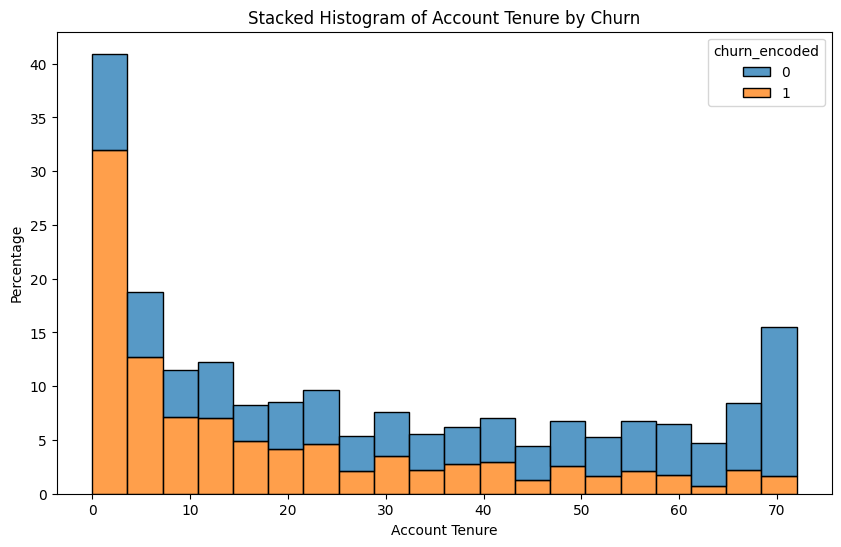

In [ ]:
#stacked histogram of account_tenure by churn_encoded
# Creating the stacked histogram
plt.figure(figsize=(10,6))
ax = sns.histplot(data=customer_churn, x='account_tenure', hue='churn_encoded',
                  stat="percent", common_norm=False, multiple="stack", bins=20)
plt.xlabel('Account Tenure')
plt.ylabel('Percentage')
plt.title('Stacked Histogram of Account Tenure by Churn')
plt.show()

From the stacked histogram of account_tenure vs churn, we can see most customers who have lower account tenure also have higher churn rates.

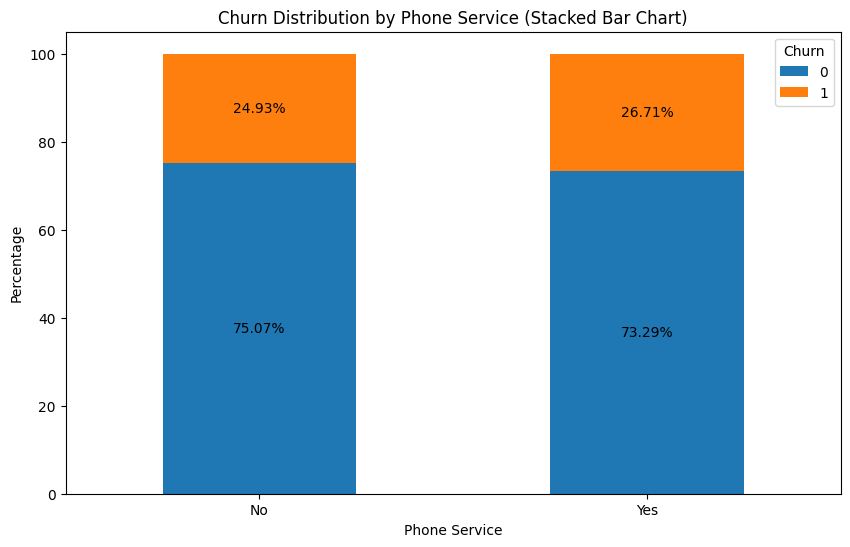

In [ ]:
#stacked barchart of PhoneService by churn_encoded
# Calculating percentages
churn_percentages = customer_churn.groupby(['PhoneService', 'churn_encoded'])['churn_encoded'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Creating the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, phone_service in enumerate(churn_percentages.index):
    cumulative = 0
    for j, churn_status in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[phone_service, churn_status]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Phone Service')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Phone Service (Stacked Bar Chart)')
plt.legend(title='Churn')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

From the stacked bar chart of PhoneService vs churn, customers who suscribe for phone service have a slightly higher churn rate than customers who did not suscribe for phone service.

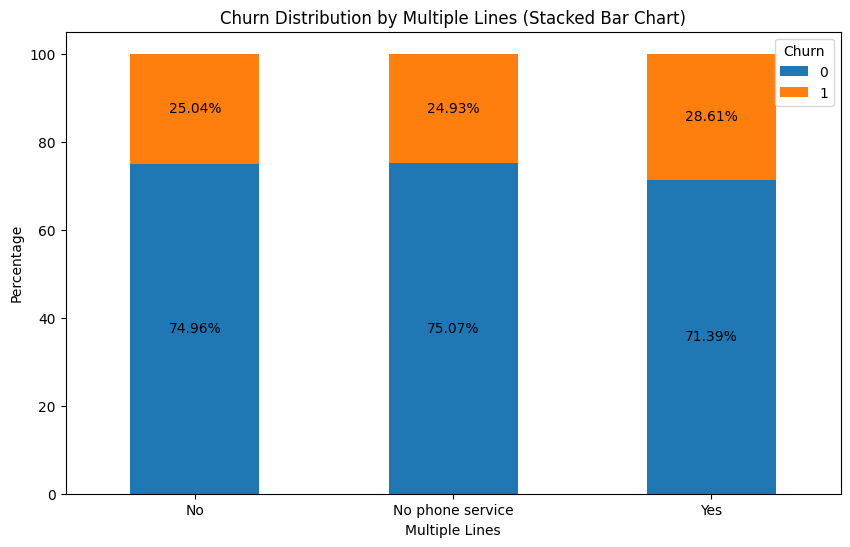

In [ ]:
#stacked barchart of MultipleLines by churn_encoded
# Calculate percentages
churn_percentages = customer_churn.groupby(['MultipleLines', 'churn_encoded'])['churn_encoded'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, multiple_lines in enumerate(churn_percentages.index):
    cumulative = 0
    for j, churn_status in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[multiple_lines, churn_status]
        # Adding the percentage text
        if percentage > 0:  # Position text at the
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Multiple Lines')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Multiple Lines (Stacked Bar Chart)')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()

From the stacked bar chart of MultipleLines vs churn, customers who have multiple lines have a slightly higher churn rate than customers who have no multiple line and no phone service.

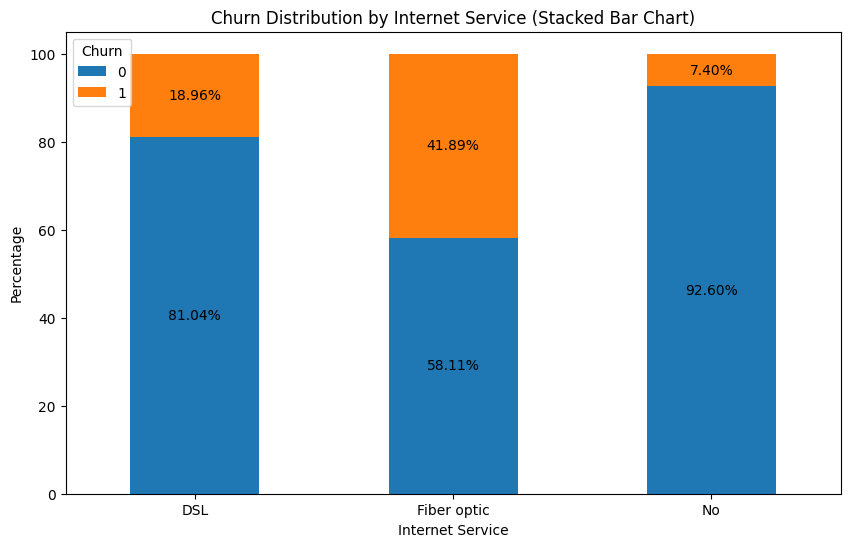

In [ ]:
#stacked barchart of InternetService by churn_encoded
# Calculate percentages
churn_percentages = customer_churn.groupby(['InternetService', 'churn_encoded'])['churn_encoded'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, internet_service in enumerate(churn_percentages.index):
    cumulative = 0
    for j, churn_status in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[internet_service, churn_status]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Internet Service')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Internet Service (Stacked Bar Chart)')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()

From the stacked bar chart of InternetService vs churn, customers whose internet service is through Fiber optic have a high churn rate of 41.89%. This is higher than the churn rate of customers who use DSL(Digital Suscriber Line), which is at 18.96%. Only 7.4% of customers who do not have internet service churned.

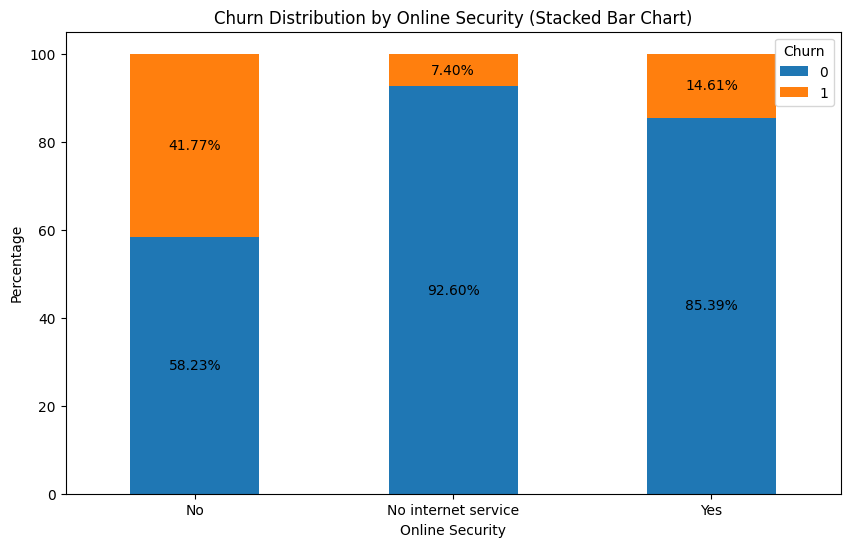

In [ ]:
#stacked barchart of OnlineSecurity by churn_encoded
# Calculate percentages
churn_percentages = customer_churn.groupby(['OnlineSecurity', 'churn_encoded'])['churn_encoded'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, online_security in enumerate(churn_percentages.index):
    cumulative = 0
    for j, churn_status in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[online_security, churn_status]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Online Security')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Online Security (Stacked Bar Chart)')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()

From the stacked bar chart of InternetSecurity vs churn, customers who do not have internet security have a high churn rate of 41.77%. This is higher than the churn rate of customers who have internet security, which is at 14.61%. Only 7.4% of customers who do not have internet service churned.

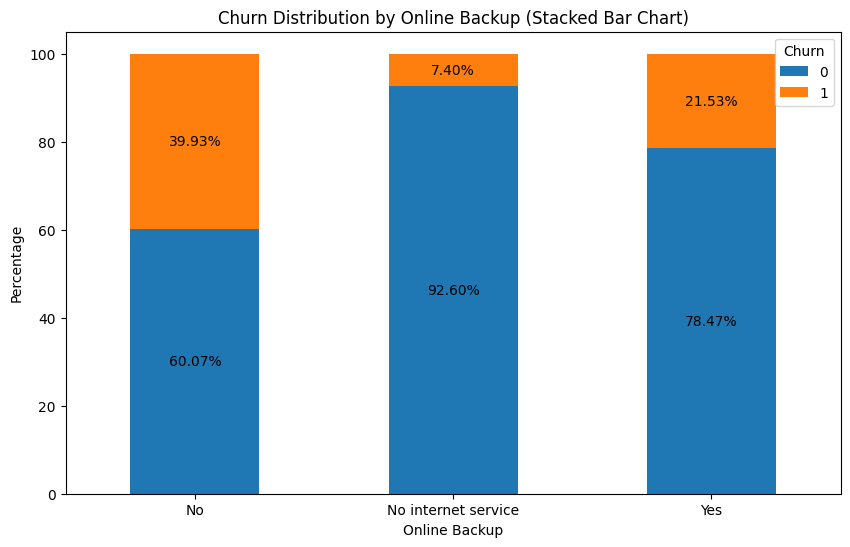

In [ ]:
#stacked barchart of OnlineBackup by churn_encoded
# Calculate percentages
churn_percentages = customer_churn.groupby(['OnlineBackup', 'churn_encoded'])['churn_encoded'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, online_backup in enumerate(churn_percentages.index):
    cumulative = 0
    for j, churn_status in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[online_backup, churn_status]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Online Backup')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Online Backup (Stacked Bar Chart)')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()

From the stacked bar chart of OnlineBackup vs churn, customers who do not have online backup have a churn rate of 39.93%. This is higher than the churn rate of customers who have online backup, which is at 21.53%. Only 7.4% of customers who do not have internet service churned.

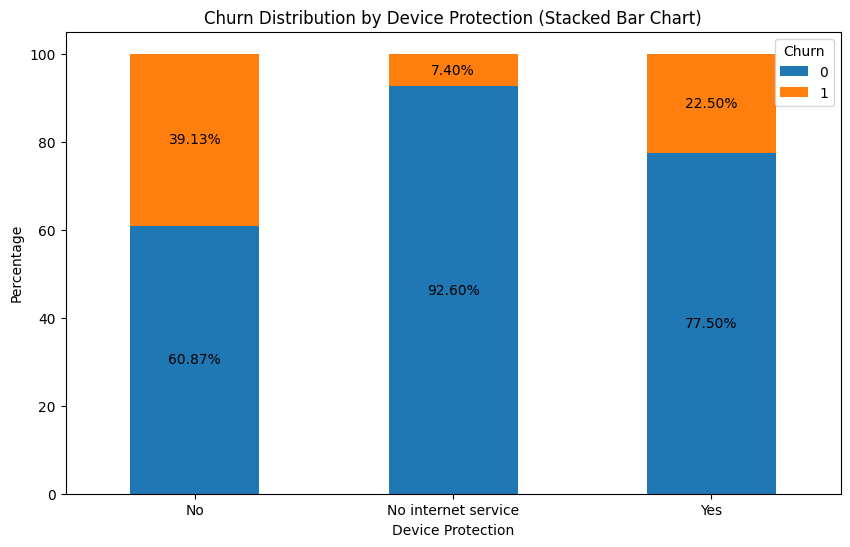

In [ ]:
#stacked barchart of DeviceProtection by churn_encoded
# Calculate percentages
churn_percentages = customer_churn.groupby(['DeviceProtection', 'churn_encoded'])['churn_encoded'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, device_protection in enumerate(churn_percentages.index):
    cumulative = 0
    for j, churn_status in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[device_protection, churn_status]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Device Protection')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Device Protection (Stacked Bar Chart)')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()

From the stacked bar chart of DeviceProtection vs churn, customers who do not have device protection have a churn rate of 39.13%. This is higher than the churn rate of customers who have device protection, which is at 22.5%. Only 7.4% of customers who do not have internet service churned.

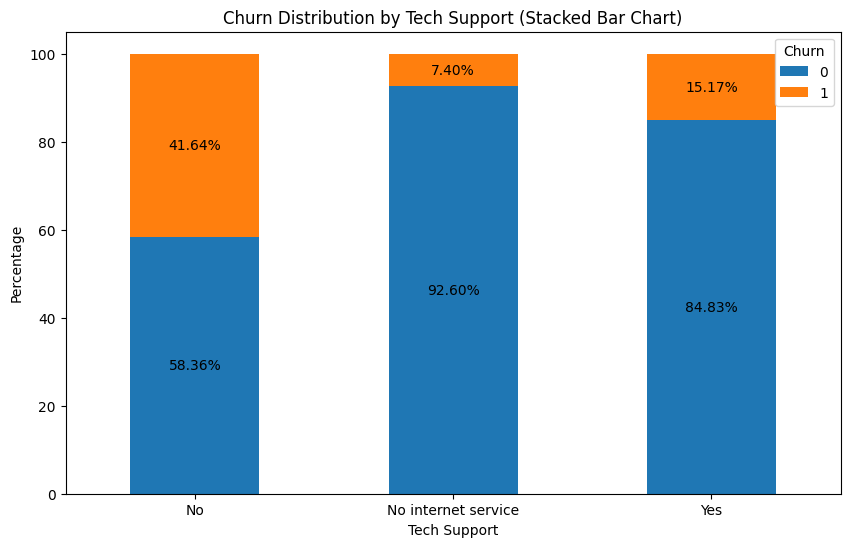

In [ ]:
#stacked barchart of TechSupport by churn_encoded
# Calculate percentages
churn_percentages = customer_churn.groupby(['TechSupport', 'churn_encoded'])['churn_encoded'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, tech_support in enumerate(churn_percentages.index):
    cumulative = 0
    for j, churn_status in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[tech_support, churn_status]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Tech Support')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Tech Support (Stacked Bar Chart)')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()

From the stacked bar chart of TechSupport vs churn, customers who do not have TechSupport have a churn rate of 41.64%. This is higher than the churn rate of customers who have TechSupport, which is at 15.17%. Only 7.4% of customers who do not have internet service churned.

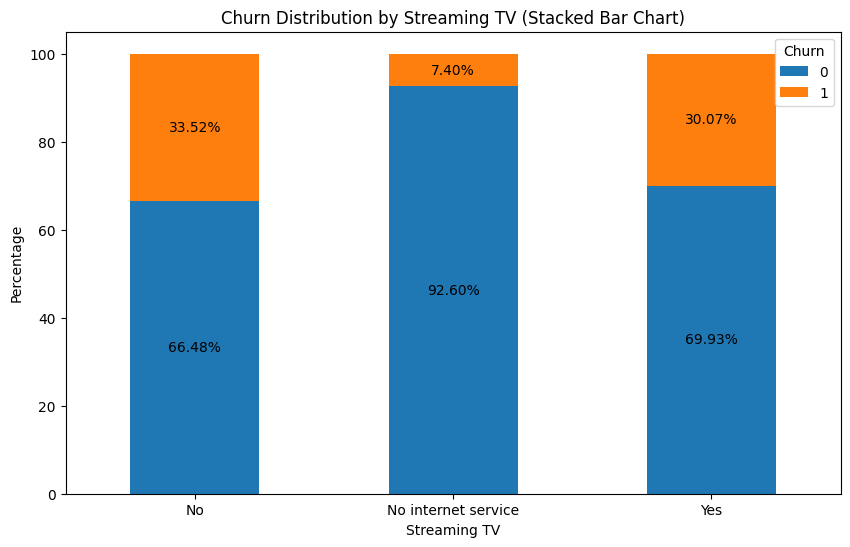

In [ ]:
#stacked barchart of StreamingTV by churn_encoded
# Calculate percentages
churn_percentages = customer_churn.groupby(['StreamingTV', 'churn_encoded'])['churn_encoded'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, streaming_tv in enumerate(churn_percentages.index):
    cumulative = 0
    for j, churn_status in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[streaming_tv, churn_status]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Streaming TV')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Streaming TV (Stacked Bar Chart)')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()

From the stacked bar chart of StreamingTV vs churn, customers who do not stream tv have a slightly higher churn rate of 33.52%. 30.07% of customers who stream tv churned and only 7.4% of customers who do not have internet service churned

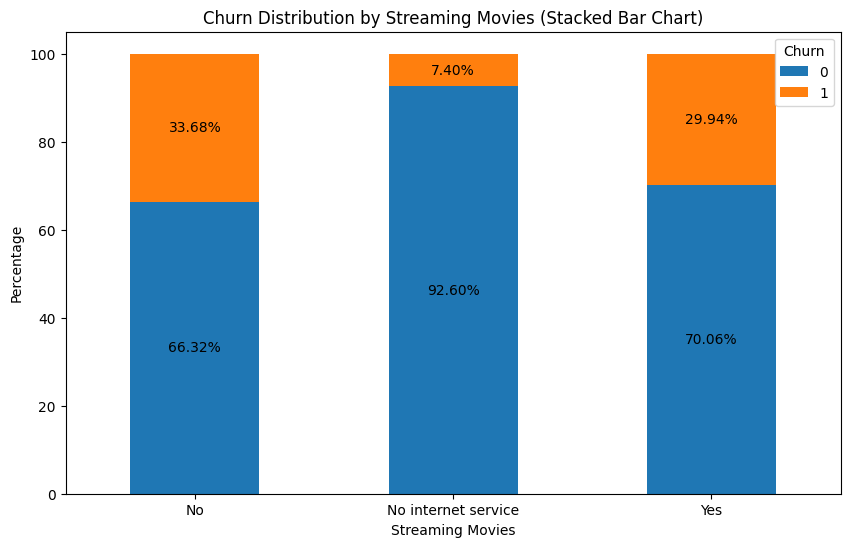

In [ ]:
#stacked barchart of StreamingMovies by churn_encoded
# Calculate percentages
churn_percentages = customer_churn.groupby(['StreamingMovies', 'churn_encoded'])['churn_encoded'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, streaming_movies in enumerate(churn_percentages.index):
    cumulative = 0
    for j, churn_status in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[streaming_movies, churn_status]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Streaming Movies')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Streaming Movies (Stacked Bar Chart)')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()

From the stacked bar chart of StreamingMovies vs churn, customers who do not stream movies have a slightly higher churn rate of 33.68%. 29.94% of customers who stream movies churned and only 7.4% of customers who do not have internet service churned

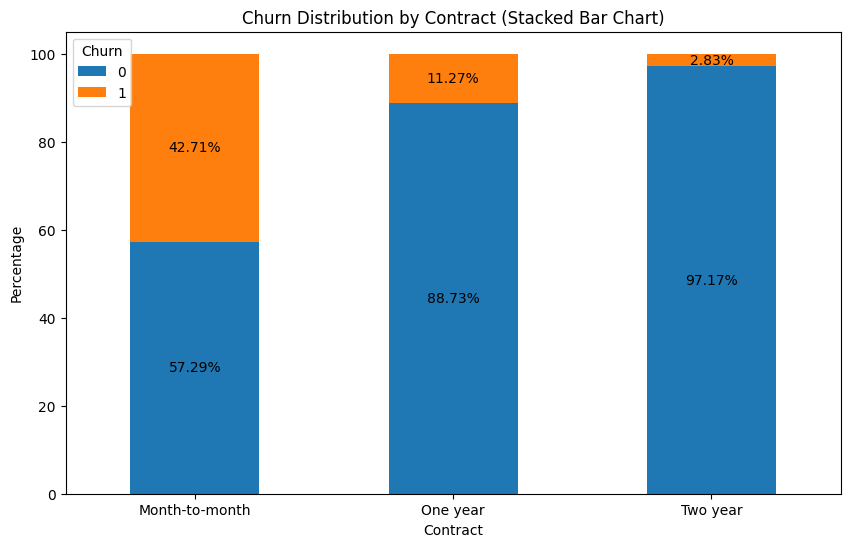

In [ ]:
#stacked barchart of Contract by churn_encoded
# Calculate percentages
churn_percentages = customer_churn.groupby(['Contract', 'churn_encoded'])['churn_encoded'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, contract in enumerate(churn_percentages.index):
    cumulative = 0
    for j, churn_status in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[contract, churn_status]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Contract')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Contract (Stacked Bar Chart)')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()

From the stacked bar chart of Contract vs churn, customers who have month-to-month contract have a high churn rate of 42.71%. 11.27% of customers who have one year contract churned and 2.83% of customers who have two year contract churned.

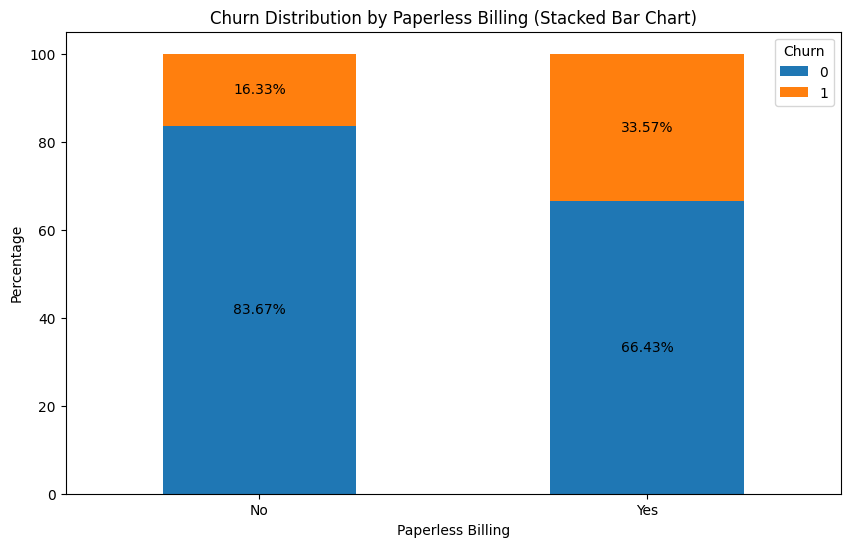

In [ ]:
#stacked barchart of PaperlessBilling by churn_encoded
# Calculate percentages
churn_percentages = customer_churn.groupby(['PaperlessBilling', 'churn_encoded'])['churn_encoded'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, paperless_billing in enumerate(churn_percentages.index):
    cumulative = 0
    for j, churn_status in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[paperless_billing, churn_status]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Paperless Billing')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Paperless Billing (Stacked Bar Chart)')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()

From the stacked bar chart of PaperlessBilling vs churn, customers who opted for paperless billing have a higher churn rate (33.57%) than customers who did not opt in for paperless billing(16.33%).

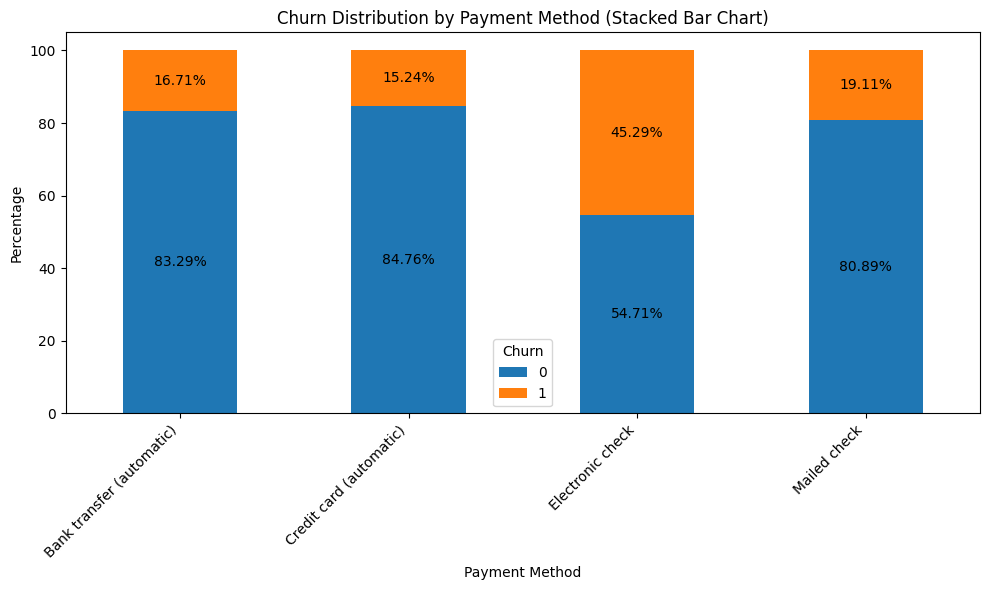

In [ ]:
#stacked barchart of PaymentMethod by churn_encoded
# Calculate percentages
churn_percentages = customer_churn.groupby(['PaymentMethod', 'churn_encoded'])['churn_encoded'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, payment_method in enumerate(churn_percentages.index):
    cumulative = 0
    for j, churn_status in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[payment_method, churn_status]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Payment Method')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Payment Method (Stacked Bar Chart)')
plt.legend(title='Churn')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the stacked bar chart of PaymentMethod vs churn, customers who use electronic check have a high churn rate of 45.29%. 19.11% of customers who use mailed check as a payment method churned, 16.17% of customers who use bank transfer (automatic) churned and 15.24% of customers who use credit card
 (automatic) churned.

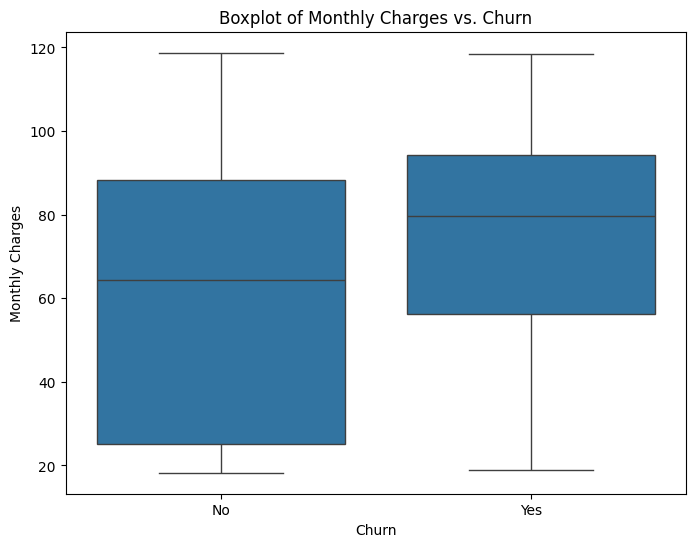

In [ ]:
#boxplot of PaymentMethod by churn_encoded
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn_encoded', y='MonthlyCharges', data=customer_churn)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Boxplot of Monthly Charges vs. Churn')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

The visualization shows the boxplot of monthly charges vs churn. The boxplot shows that a bulk of customers who churned had a higher monthly charge than customers who did not churn. This is also evident with the mean of monthly charges of customers who churned, which is sitting at 80 and the mean of monthly charges of customers who did not churn sitting at 65.

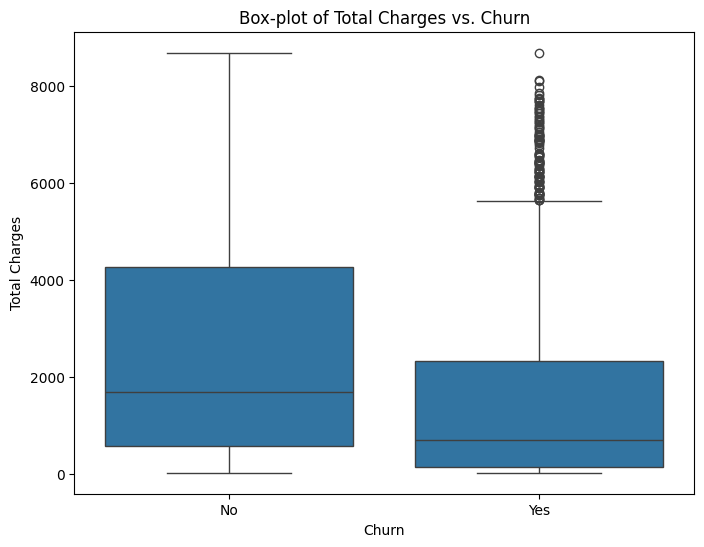

In [ ]:
#boxplot of TotalCharges by churn_encoded
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn_encoded', y='TotalCharges', data=customer_churn)
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.title('Box-plot of Total Charges vs. Churn')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

The visualization shows the box-plot of TotalCharges vs churn. There are outliers in the customers that churned and the mean of total charges of customers that churned is lower than the mean of customers that did not churn.

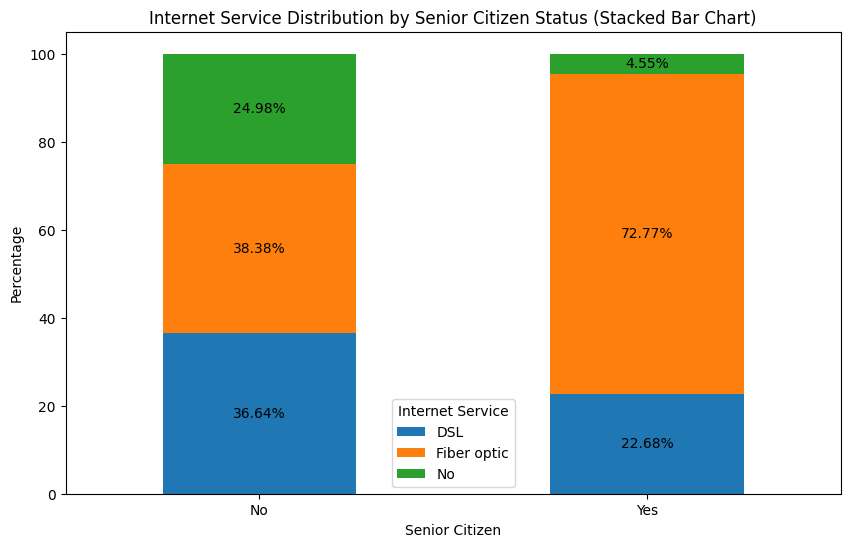

In [ ]:
#stacked barchart of InternetService by SeniorCitizen
# Calculate percentages
churn_percentages = customer_churn.groupby(['SeniorCitizen', 'InternetService'])['SeniorCitizen'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, senior_citizen in enumerate(churn_percentages.index):
    cumulative = 0
    for j, internet_service in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[senior_citizen, internet_service]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.title('Internet Service Distribution by Senior Citizen Status (Stacked Bar Chart)')
plt.legend(title='Internet Service')
plt.xticks(rotation=0)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

From the stacked barchart of InternetService by SeniorCitizen, a solid observation can be seen that senior citizens are the major users of Fiber Optic (72.77%). A greater percentage (24.98%) of customers who are not senior citizens do not suscribe/have internet service.

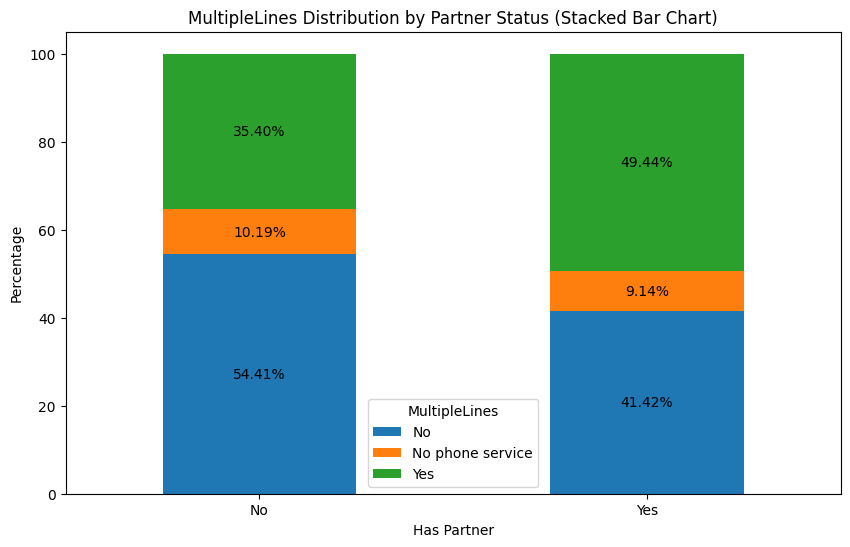

In [ ]:
#stacked barchart of MultipleLines vs Has_Partner
# Calculate percentages
churn_percentages = customer_churn.groupby(['Has_Partner', 'MultipleLines'])['Has_Partner'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, has_partner in enumerate(churn_percentages.index):
    cumulative = 0
    for j, multiple_lines in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[has_partner, multiple_lines]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Has Partner')
plt.ylabel('Percentage')
plt.title('MultipleLines Distribution by Partner Status (Stacked Bar Chart)')
plt.legend(title='MultipleLines')
plt.xticks(rotation=0)
plt.show()

The stacked barchart of MultipleLines vs Has_Partner show that customers who have partners have a greater percentage (49.44%) of owning multiple lines than customers who do not have partners.

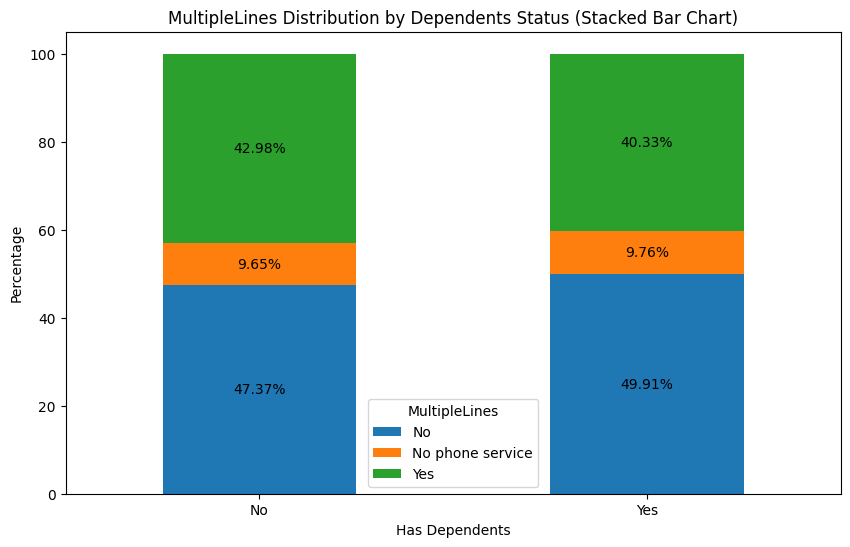

In [ ]:
#stacked barchart of Has_Dependents vs MultipleLines in percentage
# Calculate percentages
churn_percentages = customer_churn.groupby(['Has_Dependents', 'MultipleLines'])['Has_Dependents'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, has_dependents in enumerate(churn_percentages.index):
    cumulative = 0
    for j, multiple_lines in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[has_dependents, multiple_lines]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Has Dependents')
plt.ylabel('Percentage')
plt.title('MultipleLines Distribution by Dependents Status (Stacked Bar Chart)')
plt.legend(title='MultipleLines')
plt.xticks(rotation=0)
plt.show()

The stacked barchart of Has_Dependents vs MultipleLines show that there is no large significant percentage difference in customers who have dependents and own multiple lines over customers who do not have dependents.

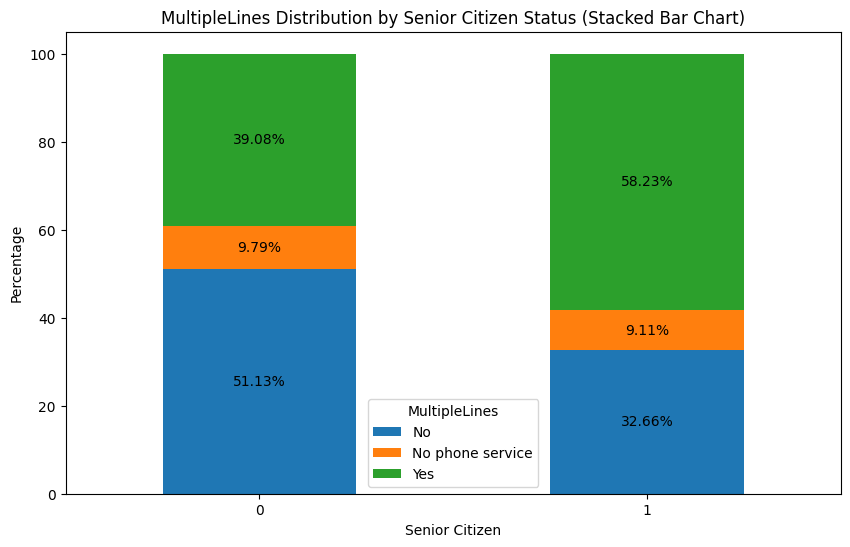

In [ ]:
#stacked barchart of SeniorCitizen vs MultipleLines
# Calculate percentages
churn_percentages = customer_churn.groupby(['SeniorCitizen', 'MultipleLines'])['SeniorCitizen'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, senior_citizen in enumerate(churn_percentages.index):
    cumulative = 0
    for j, multiple_lines in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[senior_citizen, multiple_lines]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.title('MultipleLines Distribution by Senior Citizen Status (Stacked Bar Chart)')
plt.legend(title='MultipleLines')
plt.xticks(rotation=0)
plt.show()

The stacked barchart of SeniorCitizen vs MultipleLines show that customers who are senior citizens have a higher percentage of multiple line ownership.

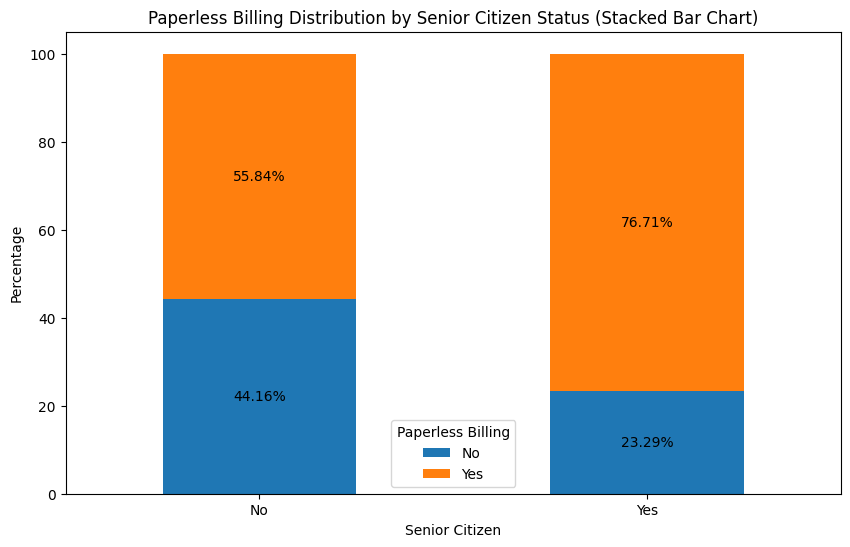

In [ ]:
#stacked barchart of SeniorCitizen vs PaperlessBilling
# Calculate percentages
churn_percentages = customer_churn.groupby(['SeniorCitizen', 'PaperlessBilling'])['SeniorCitizen'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, senior_citizen in enumerate(churn_percentages.index):
    cumulative = 0
    for j, paperless_billing in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[senior_citizen, paperless_billing]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.title('Paperless Billing Distribution by Senior Citizen Status (Stacked Bar Chart)')
plt.legend(title='Paperless Billing')
plt.xticks(rotation=0)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

The stacked barchart of SeniorCitizen vs PaperlessBilling show that customers who are senior citizens have a higher perecntage paperless billing suscription.

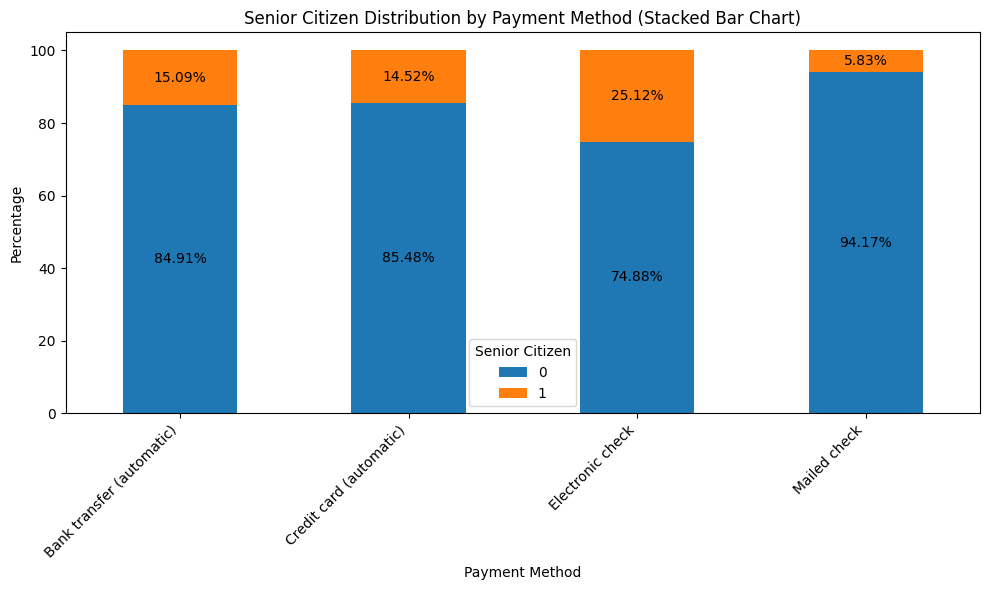

In [ ]:
#stacked barchart of PaymentMethod vs SeniorCitizen
# Calculate percentages
churn_percentages = customer_churn.groupby(['PaymentMethod', 'SeniorCitizen'])['SeniorCitizen'].count().unstack()
churn_percentages = churn_percentages.div(churn_percentages.sum(axis=1), axis=0) * 100
# Create the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding annotations for percentages
for i, payment_method in enumerate(churn_percentages.index):
    cumulative = 0
    for j, senior_citizen in enumerate(churn_percentages.columns):
        percentage = churn_percentages.loc[payment_method, senior_citizen]
        # Adding the percentage text
        if percentage > 0:
            y_pos = cumulative + (percentage / 2)
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Payment Method')
plt.ylabel('Percentage')
plt.title('Senior Citizen Distribution by Payment Method (Stacked Bar Chart)')
plt.legend(title='Senior Citizen')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

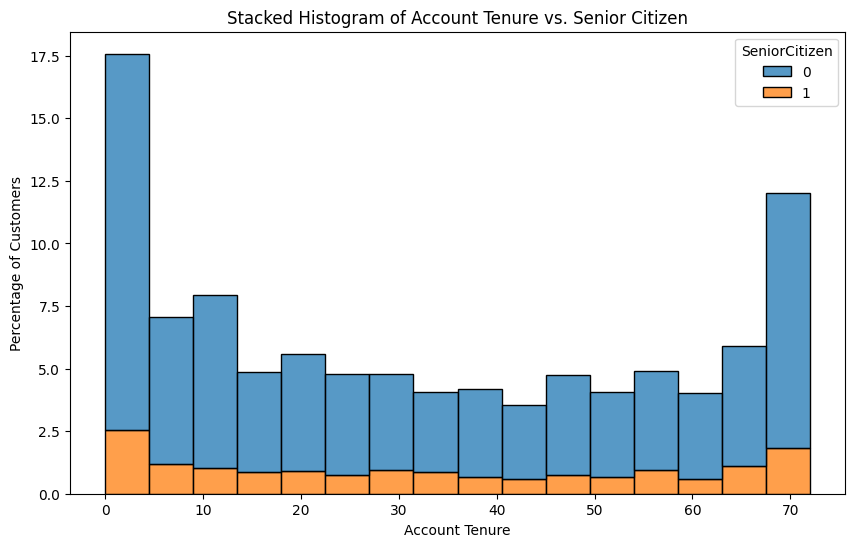

In [ ]:
#stacked histogram of account_tenure vs SeniorCitizen in percentage, hue by SeniorCitizen
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_churn, x='account_tenure', hue='SeniorCitizen', multiple="stack", stat="percent")
plt.xlabel('Account Tenure')
plt.ylabel('Percentage of Customers')
plt.title('Stacked Histogram of Account Tenure vs. Senior Citizen')
plt.show()

The stacked histogram of account_tenure vs SeniorCitizen show that customers who are senior citizens have a lower percentage in account tenure.

In [ ]:
#Feature Engineering
# Initializing LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Has_Partner', 'Has_Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TechSupport']

# Encoding the specified columns
for column in columns_to_encode:
    customer_churn[column] = label_encoder.fit_transform(customer_churn[column])

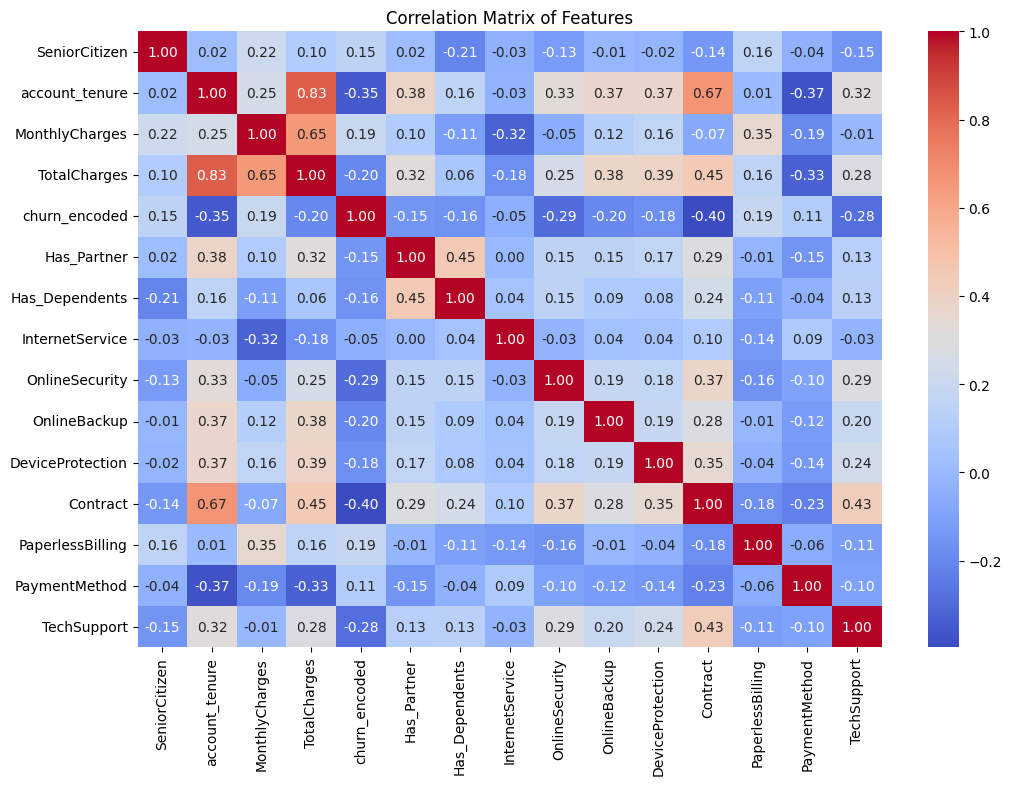

In [ ]:
# Selecting features for correlation analysis
numerical_features = ['SeniorCitizen', 'account_tenure', 'MonthlyCharges', 'TotalCharges', 'churn_encoded'] + columns_to_encode

# Calculating the correlation matrix
correlation_matrix = customer_churn[numerical_features].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

**Building the Model (Random Forest)**

In [ ]:
#building a Random Forest Model to Predict customer_churn
X = customer_churn[['Contract', 'account_tenure', 'OnlineSecurity', 'TechSupport', 'TotalCharges','OnlineBackup', 'MonthlyCharges', 'PaperlessBilling', 'DeviceProtection']]
y = customer_churn['churn_encoded']

In [ ]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

In [ ]:
# Applying SMOTE to handle class imbalance
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, y)
# Applying SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Performing cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_resampled, y_train_resampled, cv=5, scoring= 'accuracy') # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Score: {np.mean(cv_scores):.2f}")

Cross-Validation Scores: [0.74396135 0.77643505 0.88036254 0.87371601 0.8858006 ]
Mean CV Score: 0.83


In [ ]:
# Training the model on the entire training set
#rf_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train_resampled, y_train_resampled)
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy * 100:.0f}%)")
print(f"Precision: {precision:.4f} ({precision * 100:.0f}%)")
print(f"Recall: {recall:.4f} ({recall * 100:.0f}%)")
print(f"F1 Score: {f1:.4f} ({f1 * 100:.0f}%)")


Accuracy: 0.7807 (78%)
Precision: 0.5856 (59%)
Recall: 0.5871 (59%)
F1 Score: 0.5863 (59%)


In [ ]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.59      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
#auc score
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.7188


Confusion Matrix:
[[881 155]
 [154 219]]


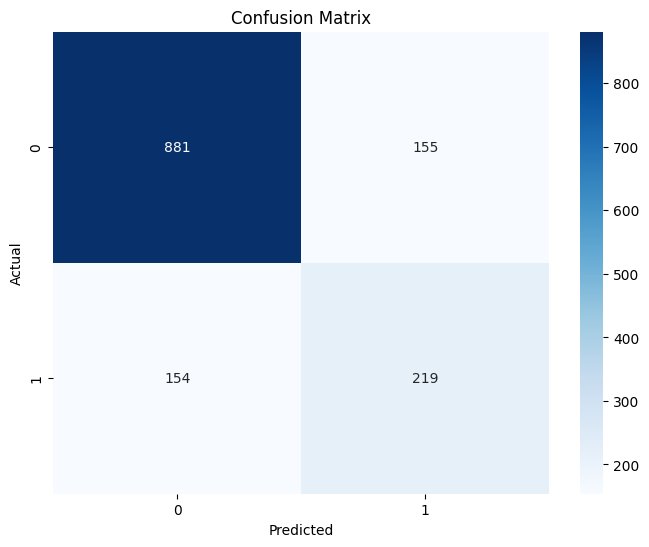

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
#visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

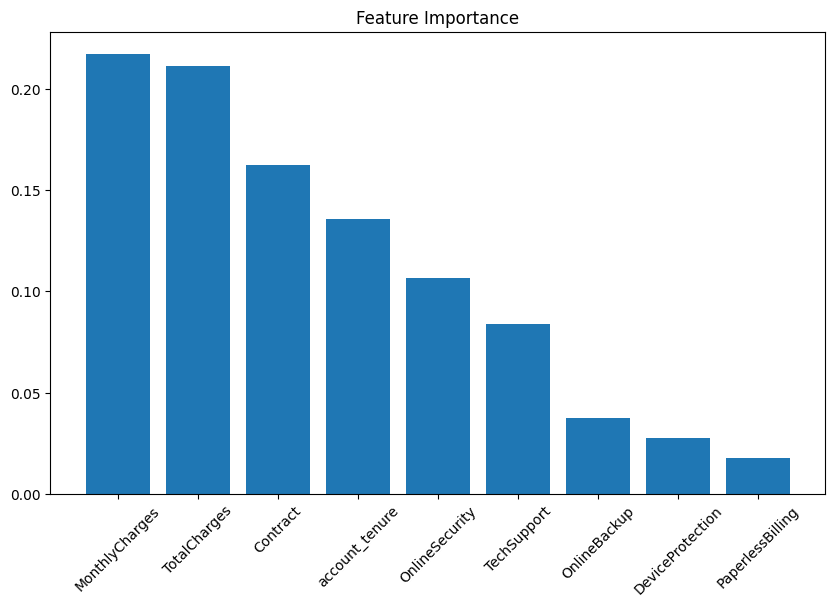

In [ ]:
#Ploting feature importance (for Random Forest)
importances = rf_classifier.feature_importances_
feature_names = X.columns
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=45)
plt.show()